# Marcin Majcher 
# Czyszczenie danych i przygotowanie zbioru do analizy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Wczytanie pliku

In [2]:
df = pd.read_table('C:\\Users\\Marcin\\Desktop\\TitanicMess.tsv')

## Wyświetlenie informacji o danych

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  892 non-null    int64 
 1   Survived     892 non-null    int64 
 2   Pclass       892 non-null    int64 
 3   Name         892 non-null    object
 4   Sex          892 non-null    object
 5   Age          719 non-null    object
 6   SibSp        892 non-null    int64 
 7   Parch        892 non-null    int64 
 8   Ticket       892 non-null    object
 9   Fare         892 non-null    object
 10  Cabin        207 non-null    object
 11  Embarked     890 non-null    object
 12  ship         892 non-null    object
dtypes: int64(5), object(8)
memory usage: 90.7+ KB


### Szukanie pustych wartości

In [4]:
df.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
ship           False
dtype: bool

### W pliku znajdują się 3 kolumny, które posiadają puste wartości - Age, Cabin i Embarked

# Czyszczenie kolumny Age

In [5]:
df['Age'].isnull().any()


True

### Szukanie wartości unikalnych

In [6]:
df['Age'].unique()

array(['22', '38', '26', '35', nan, '54', '2', '27', '14', '4', '58',
       '20', '55', '31', '34', '15', '8', '19', '40', '.9', '66', '28',
       '42', '21', '18', '3', '7', '49', '29', '65', '28,5', '5', '11',
       '45', '17', '32', '16', '25', '0,83', '30', '33', '23', '24', '46',
       '59', '71', '37', '47', '14,5', '70,5', '32,5', '12', '9', '36,5',
       '51', '55,5', '40,5', '44', '1', '61', '56', '50', '36', '45,5',
       '4435', '20,5', '62', '41', '52', '63', '23,5', '0,92', '43', '60',
       '39', '10', '64', '13', '48', '0,75', '-3', '-12', '53', '57',
       '80', '250', '70', '24,5', '6', '0,67', '30,5', '0,42', '34,5',
       '74'], dtype=object)

### Z daych unikalnych wynika, że:
    -separatorem dziesietnym jest przecinek co będzie powodować problemy
    -wiek poniżej 0
    -wiek powyżej 120

### Zamiana przecinka na kropkę

In [7]:
df['Age'] = df['Age'].str.replace(',', '.')

### Zamiana typu object na float

In [8]:
df['Age'] = df['Age'].astype(float)
df[['Age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     719 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


### Wizualizacja danych odstających kolumny Age

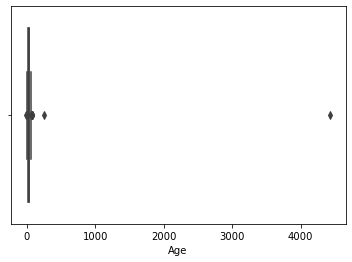

In [9]:
sns.boxplot(x=df['Age']);

In [10]:
print(np.where(df['Age']>120), np.where(df['Age']<0))

(array([223, 666], dtype=int64),) (array([507, 522], dtype=int64),)


### W celu uzyskania dokładnej średniej arytmetycznej wieku następuje:
    - usunięcie danych Age powyżej 100 i poniżej 0 i przypisanie do zmiennej age
    - usunięcie brakujących wartości ze zmennej age

In [11]:
age = df['Age'].drop(df[(df.Age < 0) | (df.Age > 100)].index)
age = age.dropna()
age.isnull().any()

False

### Policzenie średniej arytmetycznej wieku i zaokrąglenie do drugiego miejsca po przecinku

In [12]:
average = round(age.mean(), 2)
average

29.6

### Zamienienie wartości pustych, poniżej zeara oraz powyżej sto średnią arytmetyczną

In [13]:
df['Age'] = df['Age'].fillna(average)
df.loc[(df.Age > 100) | (df.Age < 0), 'Age'] = average

### Optymalizacja pamięci

In [14]:
df[['Age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     892 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


### Obecnie kolumna zajmuje 7.1 KB pamięci RAM

In [15]:
df['Age'] = df['Age'].astype('float16')
df[['Age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     892 non-null    float16
dtypes: float16(1)
memory usage: 1.9 KB


### Po zmanie typu z float64 na float16 rozmiar kolumny w pamięci RAM zmniejsza się do 1.9 KB 

# Czyszczenie kolumny Fare

In [16]:
df[['Fare']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fare    892 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [17]:
df['Fare'].unique()

array(['7,25', '71,2833', '7,925', '53,1', '8,05', '8,4583', '51,8625',
       '21,075', '11,1333', '30,0708', '16,7', '26,55', '7,8542', '16',
       '29,125', '13', '18', '7,225', '26', '8,0292', '31,3875', '263',
       '7,8792', '7,8958', '27,7208', '146,5208', '7,75', '10,5',
       '82,1708', '52', '7,2292', '11,2417', '9,475', '21', '41,5792',
       '15,5', '21,6792', '17,8', '39,6875', '7,8', '76,7292', '61,9792',
       '35,5', '27,75', '46,9', '80', '83,475', '27,9', '15,2458',
       '8,1583', '8,6625', '73,5', '14,4542', '56,4958', '7,65', '29',
       '12,475', '9', '9,5', '7,7875', '47,1', '15,85', '34,375',
       '61,175', '20,575', '34,6542', '63,3583', '23', '77,2875',
       '8,6542', '7,775', '24,15', '9,825', '14,4583', '247,5208',
       '31,275', '7,1417', '22,3583', '6,975', '7,05', '14,5', '15,0458',
       '26,2833', '9,2167', '79,2', '6,75', '11,5', '36,75', '7,7958',
       '12,525', '66,6', '7,3125', '61,3792', '7,7333', '69,55', '16,1',
       '15,75', '2

### Z powyższego wyniku widać, że separatorem jest przecinek co trzeba zamienić na kropkę. Do liczby również jest dopisana literka a, którą trzeba usunąć. Wartość poniżej zera została zastąpiona zerem. Fare czyli opłata powinna być zaokrąglana do drugiego miejsca po przecinku

In [18]:
df['Fare'] = df['Fare'].str.replace(',', '.')
df['Fare'] = df['Fare'].str.replace('a', '')

In [19]:
df['Fare'].unique()

array(['7.25', '71.2833', '7.925', '53.1', '8.05', '8.4583', '51.8625',
       '21.075', '11.1333', '30.0708', '16.7', '26.55', '7.8542', '16',
       '29.125', '13', '18', '7.225', '26', '8.0292', '31.3875', '263',
       '7.8792', '7.8958', '27.7208', '146.5208', '7.75', '10.5',
       '82.1708', '52', '7.2292', '11.2417', '9.475', '21', '41.5792',
       '15.5', '21.6792', '17.8', '39.6875', '7.8', '76.7292', '61.9792',
       '35.5', '27.75', '46.9', '80', '83.475', '27.9', '15.2458',
       '8.1583', '8.6625', '73.5', '14.4542', '56.4958', '7.65', '29',
       '12.475', '9', '9.5', '7.7875', '47.1', '15.85', '34.375',
       '61.175', '20.575', '34.6542', '63.3583', '23', '77.2875',
       '8.6542', '7.775', '24.15', '9.825', '14.4583', '247.5208',
       '31.275', '7.1417', '22.3583', '6.975', '7.05', '14.5', '15.0458',
       '26.2833', '9.2167', '79.2', '6.75', '11.5', '36.75', '7.7958',
       '12.525', '66.6', '7.3125', '61.3792', '7.7333', '69.55', '16.1',
       '15.75', '2

In [20]:
df['Fare'] = df['Fare'].astype('float')

In [21]:
df[['Fare']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fare    892 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [22]:
df.loc[(df.Fare == df.Fare), 'Fare'] = round(df.Fare, 2)

In [23]:
df.loc[(df.Fare < 0), 'Fare'] = 0

# Czyszczenie kolumny Sex

In [24]:
df[['Sex']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sex     892 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


### Sprawdzenie ulikalnych wartości

In [25]:
df['Sex'].unique()

array(['male', 'female', 'malef', 'mal', 'fem', 'femmale'], dtype=object)

### Z powyższego wyniku można wywnioskować, że tylko 'male' oraz 'female' są wartościami poprawnymi

In [26]:
df.loc[(df.Sex.str[0] == 'm'), 'Sex'] = 'male'
df.loc[(df.Sex.str[0] == 'f'), 'Sex'] = 'female'

### Sprawdzenie wyniku

In [27]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

# Czyszczenie kolumny Embarked

In [28]:
df[['Embarked']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Embarked  890 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [29]:
df['Embarked'].unique()

array(['S', 'C', 'Q', 'So', nan, 'Co', 'Qe'], dtype=object)

### Z powyższego wynka, że poprawne wartości to S, C i Q

In [30]:
df['Embarked'].value_counts()

S     643
C     167
Q      76
So      2
Qe      1
Co      1
Name: Embarked, dtype: int64

In [31]:
df['Embarked'] = df['Embarked'].str.replace("Co", "C")
df['Embarked'] = df['Embarked'].str.replace("Qe", "Q")
df['Embarked'] = df['Embarked'].str.replace("So", "S")
df['Embarked'] = df['Embarked'].fillna("S")

In [32]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

### Błędne wartości zostają zastąpnione poprawnymi a brakujące wartości najczęściej występującą

# Czyszczenie kolumny Parch
    - kolumna została zoptymalizowana pod względem pamięci RAM

In [33]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4], dtype=int64)

In [34]:
df[['Parch']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Parch   892 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [35]:
df['Parch'] = df['Parch'].astype('int8')
df[['Parch']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Parch   892 non-null    int8 
dtypes: int8(1)
memory usage: 1020.0 bytes


# Czyszczenie kolumny SibSp
- kolumna została zoptymalizowana pod względem pamięci RAM

In [36]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [37]:
df[['SibSp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SibSp   892 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [38]:
df['SibSp'] = df['SibSp'].astype('int8')
df[['SibSp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SibSp   892 non-null    int8 
dtypes: int8(1)
memory usage: 1020.0 bytes


# Czyszczenie kolumny Pclass
- kolumna została zoptymalizowana pod względem pamięci RAM

In [39]:
df['PassengerId'].value_counts()

225     3
11      3
601     1
590     1
591     1
       ..
303     1
304     1
305     1
306     1
1000    1
Name: PassengerId, Length: 888, dtype: int64

In [40]:
df[['Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  892 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [41]:
df['Pclass'] = df['Pclass'].astype('int8')
df[['Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  892 non-null    int8 
dtypes: int8(1)
memory usage: 1020.0 bytes


# Czyszczenie kolumny Survived
- kolumna została zoptymalizowana pod względem pamięci RAM

In [42]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [43]:
df[['Survived']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  892 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [44]:
df['Survived'] = df['Survived'].astype('int8')
df[['Survived']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  892 non-null    int8 
dtypes: int8(1)
memory usage: 1020.0 bytes


# Czyszczenie kolumny PassengerId
- dane w tej kolumnie powinny być unikalne a nie są 
- następuje usunięcie duplikatów
- kolumna zostaje zoptymalizowana pod względem pamięci RAM

In [45]:
df['PassengerId'].value_counts()

225     3
11      3
601     1
590     1
591     1
       ..
303     1
304     1
305     1
306     1
1000    1
Name: PassengerId, Length: 888, dtype: int64

In [46]:
df[['PassengerId']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  892 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [47]:
df = df.drop_duplicates('PassengerId',keep='first')

In [48]:
df['PassengerId'].value_counts()

1       1
600     1
589     1
590     1
591     1
       ..
302     1
303     1
304     1
305     1
1000    1
Name: PassengerId, Length: 888, dtype: int64

In [49]:
df[['PassengerId']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 891
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  888 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


In [50]:
df['PassengerId'] = df['PassengerId'].astype('int16')

In [51]:
df[['PassengerId']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 891
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  888 non-null    int16
dtypes: int16(1)
memory usage: 8.7 KB


# W kolumnie Cabin brakuje ok. 77% wartości wiec zostaje usunięta

In [52]:
df[['Cabin']].info()

df = df.drop('Cabin',axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 891
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cabin   203 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int16  
 1   Survived     888 non-null    int8   
 2   Pclass       888 non-null    int8   
 3   Name         888 non-null    object 
 4   Sex          888 non-null    object 
 5   Age          888 non-null    float16
 6   SibSp        888 non-null    int8   
 7   Parch        888 non-null    int8   
 8   Ticket       888 non-null    object 
 9   Fare         888 non-null    float64
 10  Embarked     888 non-null    object 
 11  ship         888 non-null    object 
dtypes: float16(1), float64(1), int16(1), int8(4), object(5)
memory usage: 55.5+ KB


# Zmiana nazwy kolumny ship na Ship

In [54]:
df = df.rename(columns=lambda x: x.replace('ship', 'Ship'))

# Kolumna Name, Ship oraz Ticket nie wymaga czyszczenia

# Zapis do pliku

In [55]:
df.to_csv('C:\\Users\\Marcin\\Desktop\\TitanicCleaned.tsv', index = False, sep ='\t')